In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import tensorflow as tf
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import matplotlib.font_manager as fm 

font_fname = 'C:/Windows/Fonts/Malgun.ttf' #적용할 폰트
font_family = fm.FontProperties(fname=font_fname).get_name() #폰트 설정
plt.rcParams["font.family"] = font_family  #폰트 적용

# 부호 오류 고치기 코드
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings(action='ignore')

os.chdir(r"C:\Users\82109\project\2021 빅데이터 경진대회\최종")

In [11]:
comp_1_one=pd.read_csv('comp1_concattt.csv')

TRAIN_SPLIT = 43135

comp_1_one.drop('Unnamed: 0', axis=1, inplace=True)

comp_1_one['TIMESTAMP'] = pd.to_datetime(comp_1_one['TIME'])
comp_1_one.drop('TIME', axis = 1, inplace=True)
comp_1_one.set_index('TIMESTAMP', inplace=True)

X = comp_1_one
X_train = comp_1_one[:43135]
X_test = comp_1_one[43135:]
X_train = X_train[['전류평균', '온도', '선간전압평균', '누적전력량', '주파수', '전압고조파평균','역률평균']]
X_test = X_test[['전류평균', '온도', '선간전압평균', '누적전력량', '주파수', '전압고조파평균','역률평균']]

In [12]:
from sklearn import preprocessing

# 1. 스케일러를 선택 후 스케일러 객체를 지정한다
scaler = preprocessing.StandardScaler()

# 2. 스케일러 객체의 fit()함수를 이용하여 필요한 파라미터를 저장한다
# scaler_fit에는 칼럼별 최대와 최소값이 저장되어있다.
scaler_fit = scaler.fit(X)

# 3. 스케일러 객체의 transform()함수를 이용하여 스케일링을 수행한다
result=scaler_fit.transform(X)

In [13]:
def feature_engineering_scaling(scaler, X_train, X_test):
    # scaler파라미터는 아래 4개중 하나를 넣는다
    # preprocessing.MinMaxScaler()
    # preprocessing.StandardScaler()
    # preprocessing.RobustScaler()
    # preprocessing.Normalizer()
    scaler = scaler
    scaler_fit = scaler.fit(X_train)
    X_train_scaling = pd.DataFrame(scaler_fit.transform(X_train), 
                               index=X_train.index, columns=X_train.columns)
    X_test_scaling = pd.DataFrame(scaler_fit.transform(X_test), 
                               index=X_test.index, columns=X_test.columns)
    return X_train_scaling, X_test_scaling

In [15]:
X_train_scaling, X_test_scaling = feature_engineering_scaling(scaler, X_train, X_test)

X_train_scaling = X_train_scaling[['전류평균', '온도', '선간전압평균', '누적전력량', '주파수', '전압고조파평균', '역률평균']]
X_test_scaling = X_test_scaling[['전류평균', '온도', '선간전압평균', '누적전력량', '주파수', '전압고조파평균', '역률평균']]
y_train = X_train_scaling[['역률평균']]
y_test = X_test_scaling[['역률평균']]
X_train = X_train_scaling[['전류평균', '온도', '선간전압평균', '누적전력량', '주파수', '전압고조파평균']]
X_test = X_test_scaling[['전류평균', '온도', '선간전압평균', '누적전력량', '주파수', '전압고조파평균']]

In [18]:
seasonal_lag = 6

for i in X_train_scaling.columns:
    X_train_scaling[i]=X_train_scaling[i].diff(seasonal_lag)
    
for i in X_test_scaling.columns:
    X_test_scaling[i]=X_test_scaling[i].diff(seasonal_lag)

X_train_scaling = X_train_scaling.dropna()
X_test_scaling = X_test_scaling.dropna()

y_train = X_train_scaling[['역률평균']]
y_test = X_test_scaling[['역률평균']]
X_train = X_train_scaling[['전류평균', '온도', '선간전압평균', '누적전력량', '주파수', '전압고조파평균']]
X_test = X_test_scaling[['전류평균', '온도', '선간전압평균', '누적전력량', '주파수', '전압고조파평균']]

In [22]:
from pycaret.regression import *

clf = setup(data = X_train_scaling, target = '역률평균', train_size = 0.8, session_id = 6)

best5models = compare_models(sort = 'RMSE', n_select = 5)

best5models

[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=6, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=False),
 ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, min_

In [23]:
gbr = create_model('gbr', fold = 5, cross_validation = True)
et = create_model('et', fold = 5, cross_validation = True)
rf = create_model('rf', fold = 5, cross_validation = True)
xgb = create_model('xgboost', fold = 5, cross_validation = True)
knn = create_model('knn', fold = 5, cross_validation = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0322,0.0408,0.2021,0.4218,0.0891,4.0597
1,0.0328,0.0410,0.2024,0.5210,0.0928,3.9789
2,0.0328,0.0391,0.1979,0.5766,0.0939,3.8749
3,0.0347,0.0441,0.2099,0.5086,0.0876,24.3207
4,0.0296,0.0328,0.1811,0.5126,0.0850,3.9412
Mean,0.0324,0.0396,0.1987,0.5081,0.0897,8.0351
SD,0.0016,0.0037,0.0096,0.0497,0.0033,8.1430


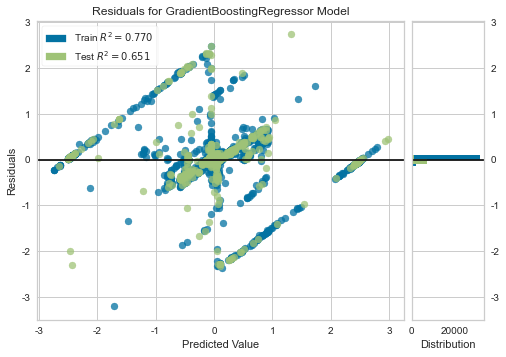

In [24]:
plot_model(gbr)

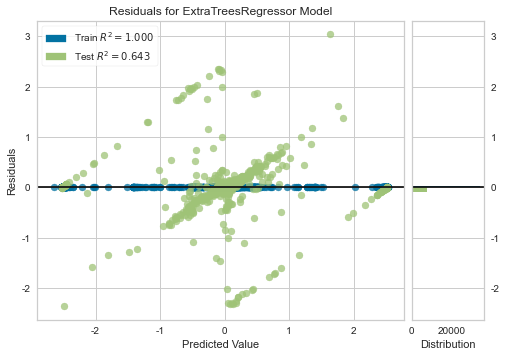

In [25]:
plot_model(et)

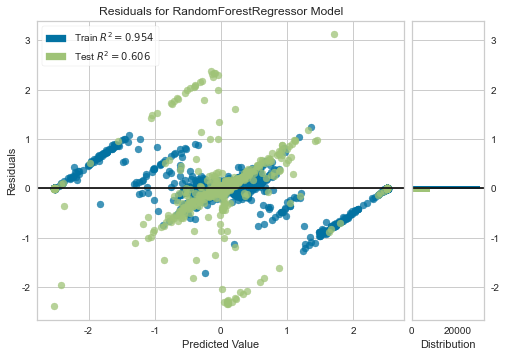

In [26]:
plot_model(rf)

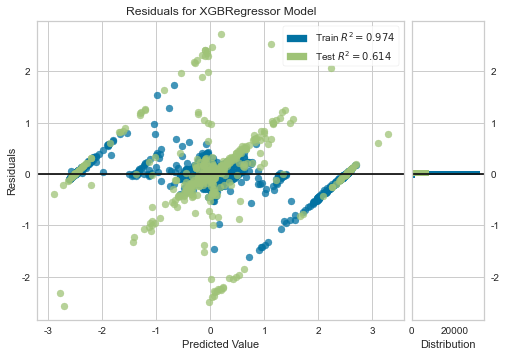

In [27]:
plot_model(xgb)

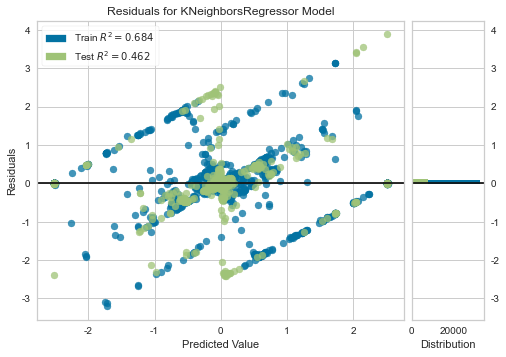

In [28]:
plot_model(knn)

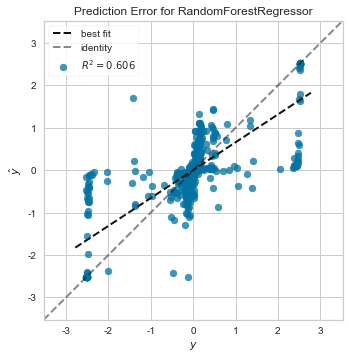

In [30]:
plot_model(gbr, plot='error')

plot_model(rf, plot='error')

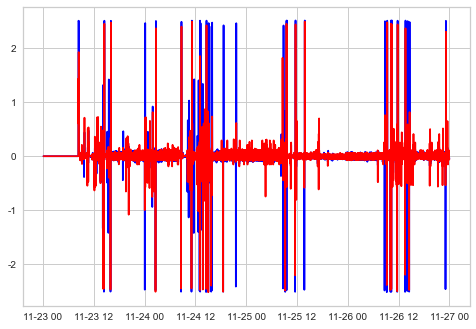

In [32]:
final_model = finalize_model(gbr)
pred = predict_model(final_model, data = X_test)

plt.plot(X_test_scaling.index, X_test_scaling['역률평균'],color = 'blue')
plt.plot(X_test_scaling.index, pred['Label'], color = 'red')

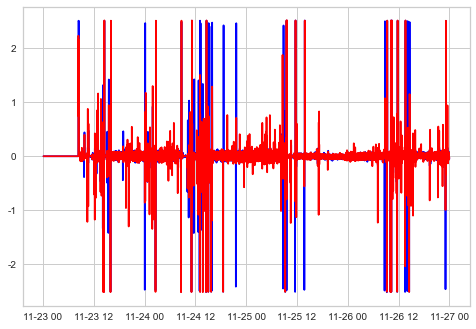

In [34]:
final_model = finalize_model(rf)
pred = predict_model(final_model, data = X_test)

plt.plot(X_test_scaling.index, X_test_scaling['역률평균'],color = 'blue')
plt.plot(X_test_scaling.index, pred['Label'], color = 'red')

In [35]:
# 모델 블렌딩

blender_specific = blend_models(estimator_list = [gbr,rf,xgb], optimize = 'RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0282,0.0328,0.1812,0.5735,0.0844,3.8204
1,0.0242,0.0247,0.1572,0.6144,0.0766,4.9132
2,0.0223,0.0175,0.1322,0.7442,0.0692,3.4751
3,0.0265,0.0292,0.1710,0.7153,0.0841,3.9111
4,0.0236,0.0226,0.1502,0.7492,0.0732,2.0529
5,0.0265,0.0280,0.1674,0.7050,0.0822,3.3939
6,0.0255,0.0248,0.1575,0.7229,0.0768,5.0412
7,0.0261,0.0289,0.1701,0.6776,0.0731,2.9463
8,0.0219,0.0188,0.1372,0.6664,0.0669,3.0882
9,0.0258,0.0274,0.1655,0.6496,0.0797,2.8180


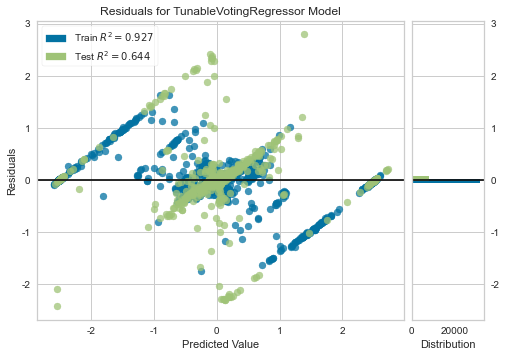

In [36]:
plot_model(blender_specific)

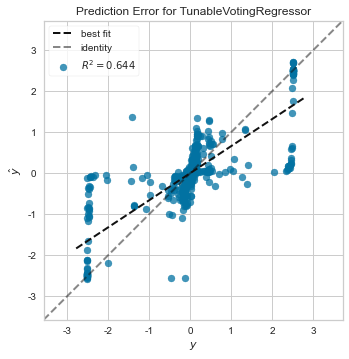

In [37]:
plot_model(blender_specific, plot='error')

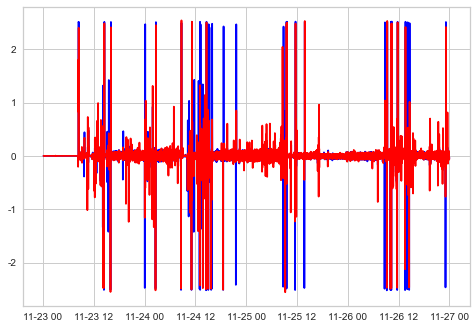

In [39]:
final_model = finalize_model(blender_specific)
pred = predict_model(final_model, data = X_test)

plt.plot(X_test_scaling.index, X_test_scaling['역률평균'],color = 'blue')
plt.plot(X_test_scaling.index, pred['Label'], color = 'red')